In [44]:
import yfinance as yf

In [45]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [46]:
stock = "GOOG"
df = yf.download(stock, start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [47]:
df.shape

(4941, 6)

In [48]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4.941000e+03
mean,43.189312,43.646583,42.755195,43.210114,43.210114,1.173073e+08
std,40.453197,40.910141,40.049569,40.488155,40.488155,1.504743e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.934767,13.051081,12.802015,12.927295,12.927295,2.798200e+07
50%,26.803286,26.976999,26.582020,26.775988,26.775988,5.871124e+07
75%,58.955002,59.452999,58.313000,58.880001,58.880001,1.452624e+08
max,155.080002,157.000000,154.132004,156.500000,156.500000,1.650833e+09


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4941 entries, 2004-08-19 to 2024-04-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4941 non-null   float64
 1   High       4941 non-null   float64
 2   Low        4941 non-null   float64
 3   Close      4941 non-null   float64
 4   Adj Close  4941 non-null   float64
 5   Volume     4941 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 270.2 KB


In [50]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

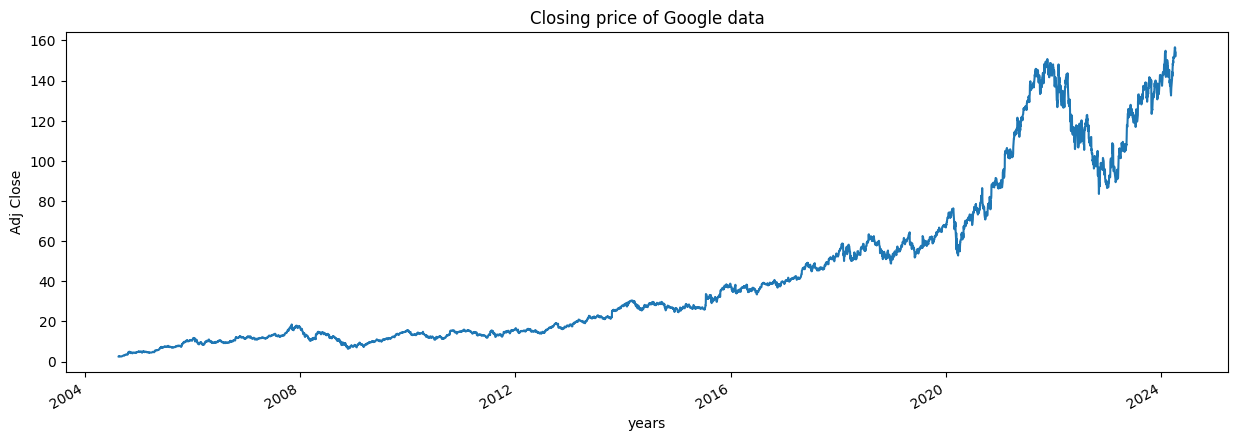

In [52]:
plt.figure(figsize = (15,5))
df['Adj Close'].plot()
plt.xlabel('years')
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [53]:
def plot_graph(figsize, values, column_name):
  plt.figure()
  values.plot(figsize = figsize)
  plt.xlabel('years')
  plt.ylabel(column_name)
  plt.title(f"{column_name} of Google data")

In [54]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

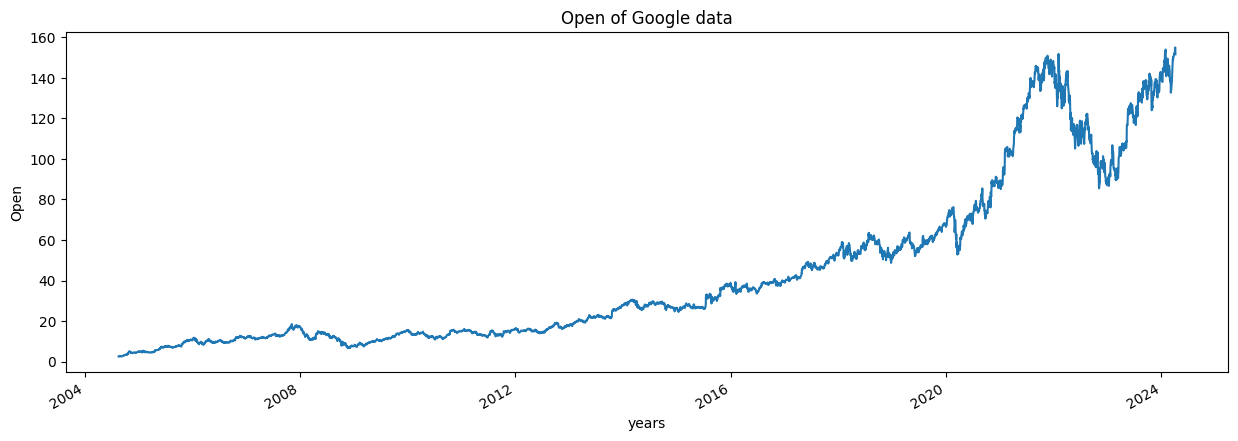

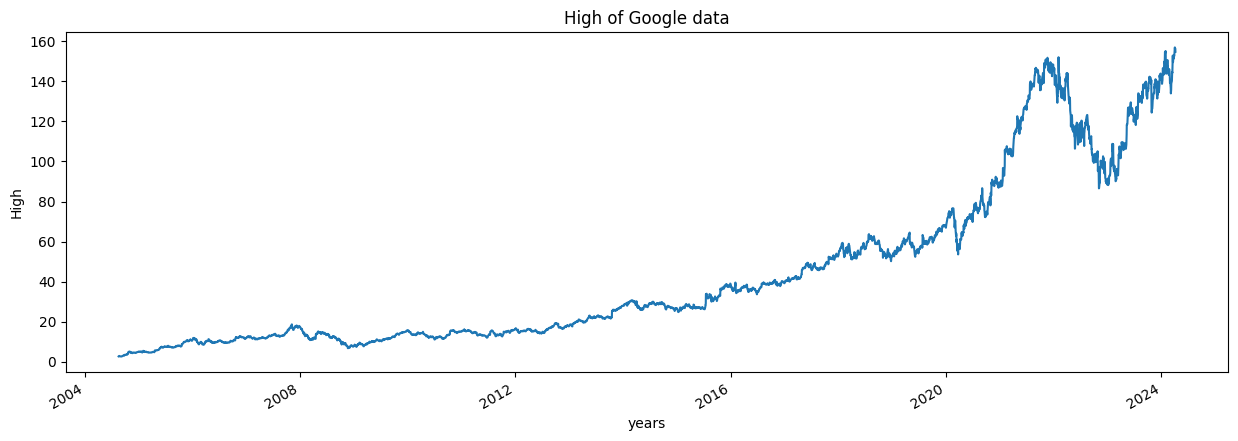

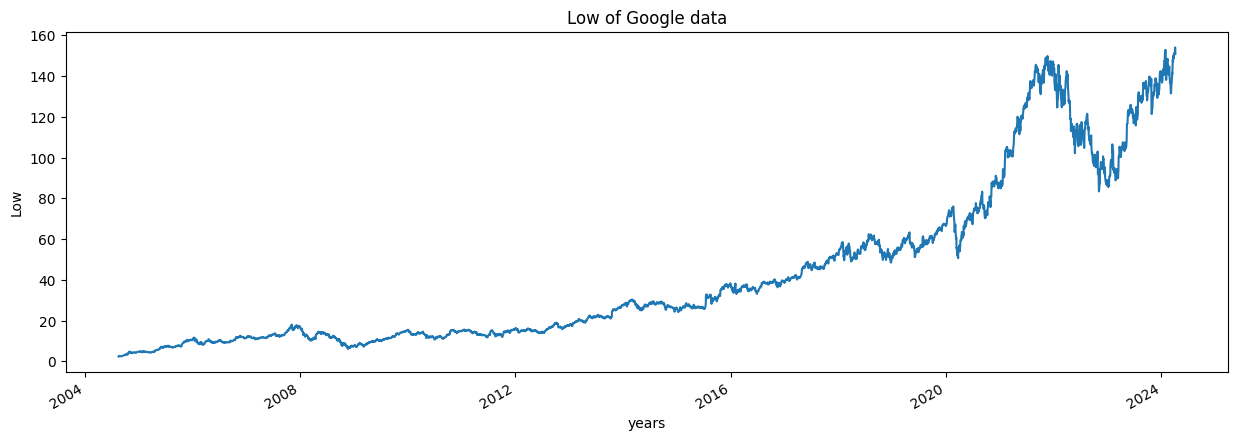

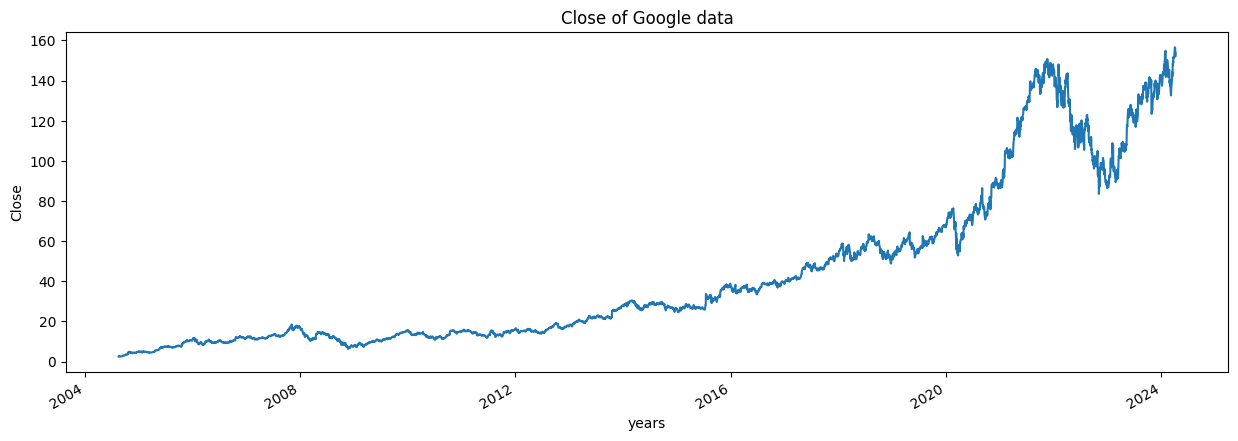

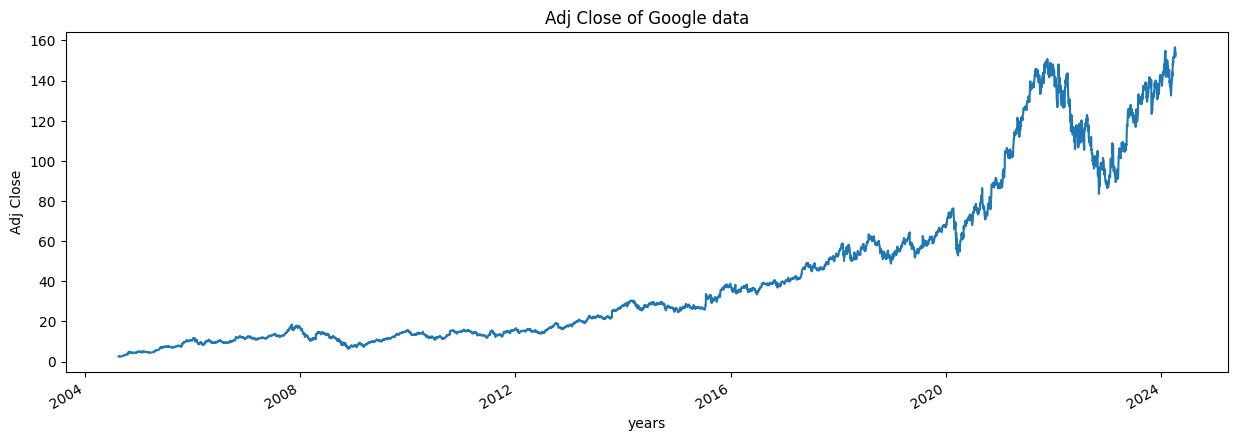

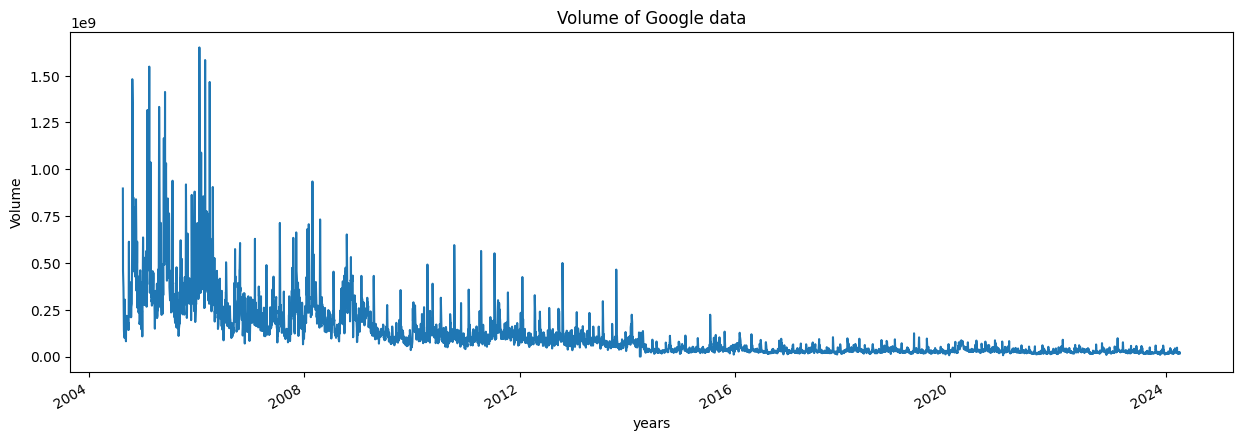

In [55]:
for column in df.columns:
  plot_graph((15,5),df[column], column)

In [56]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [57]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [58]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [59]:
for i in range(2004,2025):
  print(i,list(df.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 66


In [60]:
df["MA_for_250_days"] = df['Adj Close'].rolling(250).mean()
df["MA_for_250_days"][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.034039
Name: MA_for_250_days, dtype: float64

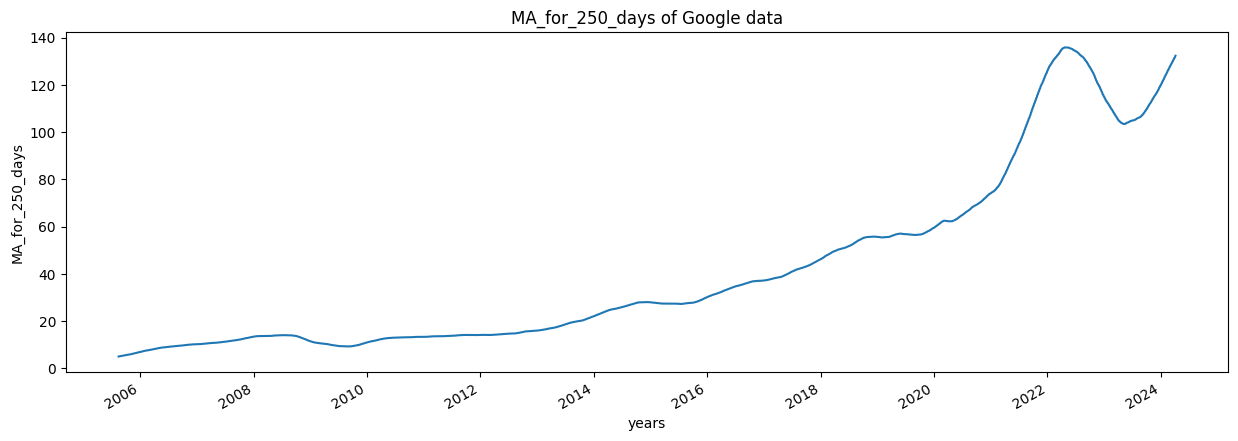

In [61]:
plot_graph((15,5),df['MA_for_250_days'],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

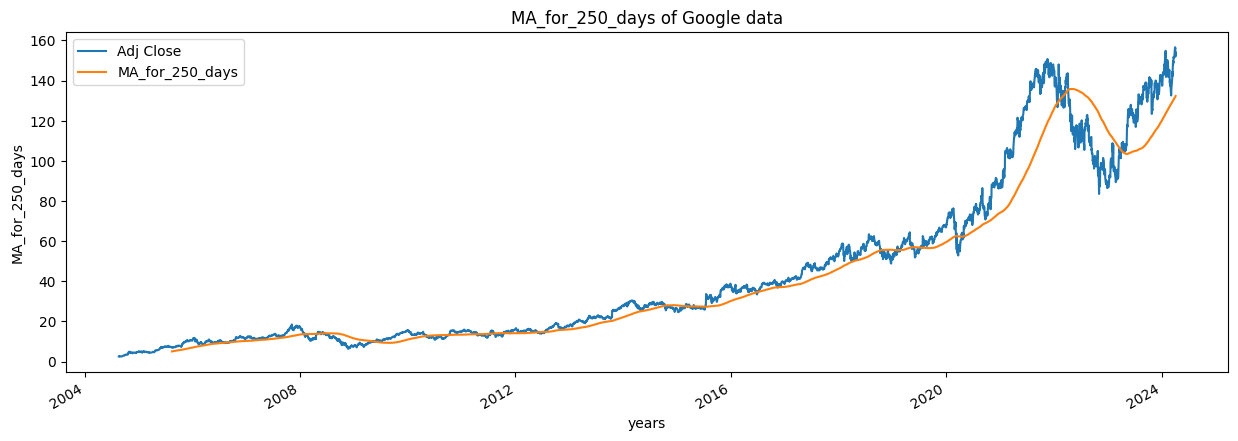

In [62]:
plot_graph((15,5),df[['Adj Close','MA_for_250_days']],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

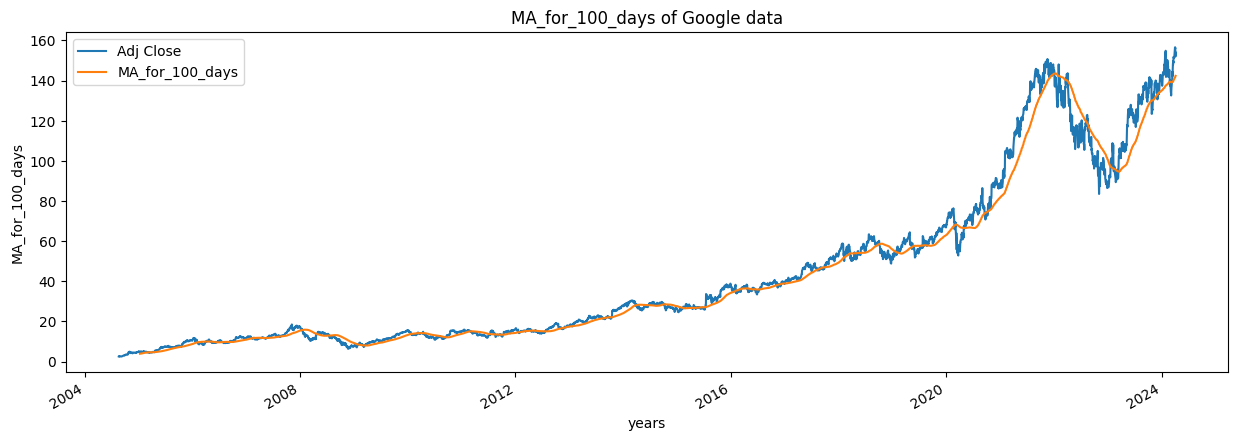

In [63]:
df["MA_for_100_days"] = df['Adj Close'].rolling(100).mean()
plot_graph((15,5),df[['Adj Close','MA_for_100_days']],'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

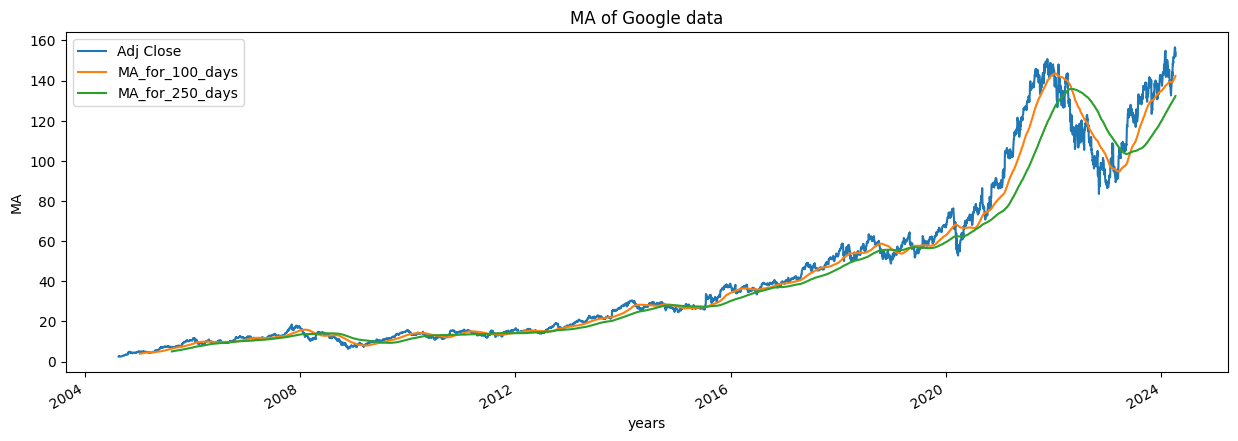

In [64]:
plot_graph((15,5),df[['Adj Close','MA_for_100_days','MA_for_250_days']],'MA')

In [65]:
df['percentage_change_cp'] = df['Adj Close'].pct_change()
df[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.499133,NaN
2004-08-20,2.697639,0.079430
2004-08-23,2.724787,0.010064
2004-08-24,2.611960,-0.041408
2004-08-25,2.640104,0.010775


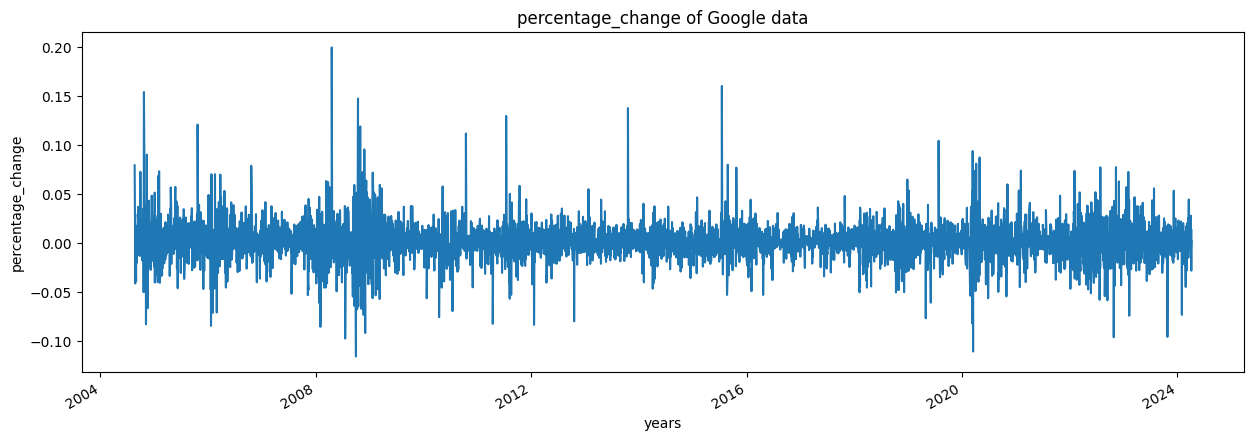

In [66]:
plot_graph((15,5),df['percentage_change_cp'], 'percentage_change')

In [67]:
Adj_close_price = df[['Adj Close']]

In [68]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([156.5]), array([2.49091291]))

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[5.33747451e-05],
       [1.34229790e-03],
       [1.51857327e-03],
       ...,
       [9.99155862e-01],
       [9.70391373e-01],
       [9.83377620e-01]])

In [70]:
len(scaled_data)

4941

In [71]:
x_data=[]
y_data=[]
for i in range(100,len(scaled_data)):
  x_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i])

import numpy as np
x_data,y_data = np.array(x_data), np.array(y_data)

In [72]:
x_data[0],y_data[0]

(array([[5.33747451e-05],
        [1.34229790e-03],
        [1.51857327e-03],
        [7.85973232e-04],
        [9.68716483e-04],
        [1.27760668e-03],
        [9.92974916e-04],
        [3.23448355e-04],
        [3.81667046e-04],
        [3.88165891e-05],
        [2.42584331e-04],
        [0.00000000e+00],
        [2.53906997e-04],
        [3.70349024e-04],
        [3.71965221e-04],
        [8.60364728e-04],
        [1.21129927e-03],
        [1.85657359e-03],
        [1.93904916e-03],
        [2.25763964e-03],
        [2.82690472e-03],
        [3.12932239e-03],
        [2.88350566e-03],
        [2.97083138e-03],
        [3.36543884e-03],
        [3.20533163e-03],
        [2.95143082e-03],
        [4.34223785e-03],
        [5.02470482e-03],
        [4.78535443e-03],
        [5.26728761e-03],
        [5.66835366e-03],
        [6.20365383e-03],
        [5.99503595e-03],
        [6.28127927e-03],
        [6.10015377e-03],
        [5.70070236e-03],
        [6.04678676e-03],
        [6.6

In [73]:
int(len(x_data)*0.7)

3388

In [74]:
4908-100-int(len(x_data)*0.7)

1420

In [75]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3388, 100, 1)
(3388, 1)
(1453, 100, 1)
(1453, 1)


In [76]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [77]:
model = Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [78]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [79]:
model.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
3388/3388 [==============================] - 302s 88ms/step - loss: 1.4868e-04
Epoch 2/2
3388/3388 [==============================] - 302s 89ms/step - loss: 7.1878e-05


In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 128)          66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
predictions = model.predict(x_test)

46/46 [==============================] - 5s 84ms/step


In [82]:
predictions

array([[0.35406613],
       [0.35008308],
       [0.3493194 ],
       ...,
       [0.9651394 ],
       [0.96993613],
       [0.9600451 ]], dtype=float32)

In [83]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 57.020317],
       [ 56.40689 ],
       [ 56.289276],
       ...,
       [151.13115 ],
       [151.86989 ],
       [150.34657 ]], dtype=float32)

In [84]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 55.19900131],
       [ 55.71099854],
       [ 55.78250122],
       ...,
       [156.36999512],
       [151.94000244],
       [153.94000244]])

In [85]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
rmse

2.5769956720554195

In [86]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = df.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-06-27,55.199001,57.020317
2018-06-28,55.710999,56.406891
2018-06-29,55.782501,56.289276
2018-07-02,56.373001,56.412754
2018-07-03,55.144501,56.797386


<Figure size 640x480 with 0 Axes>

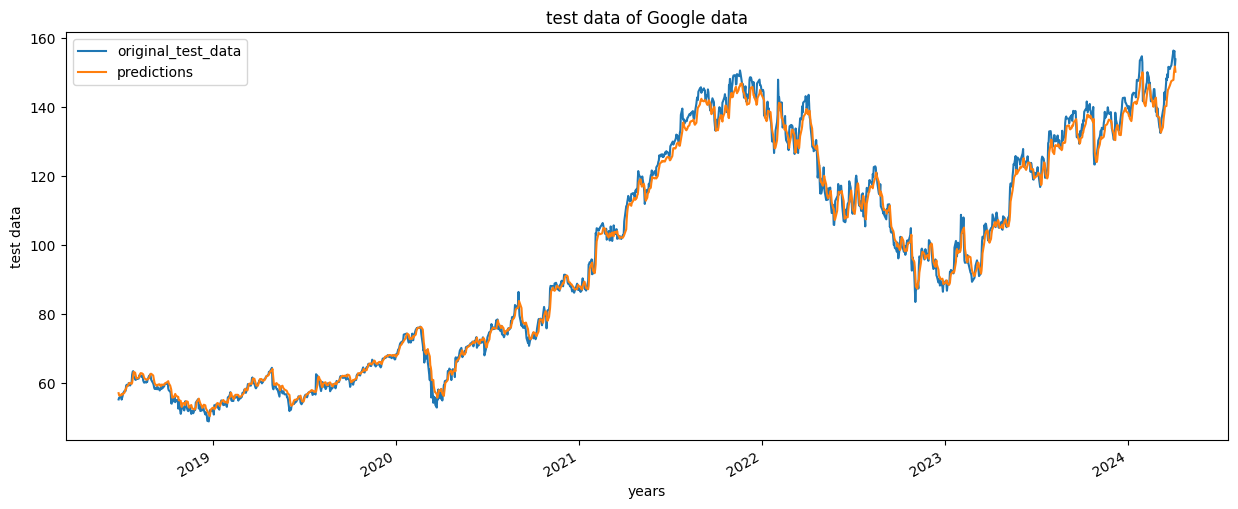

In [87]:
plot_graph((15,6),ploting_data,'test data')

<Figure size 640x480 with 0 Axes>

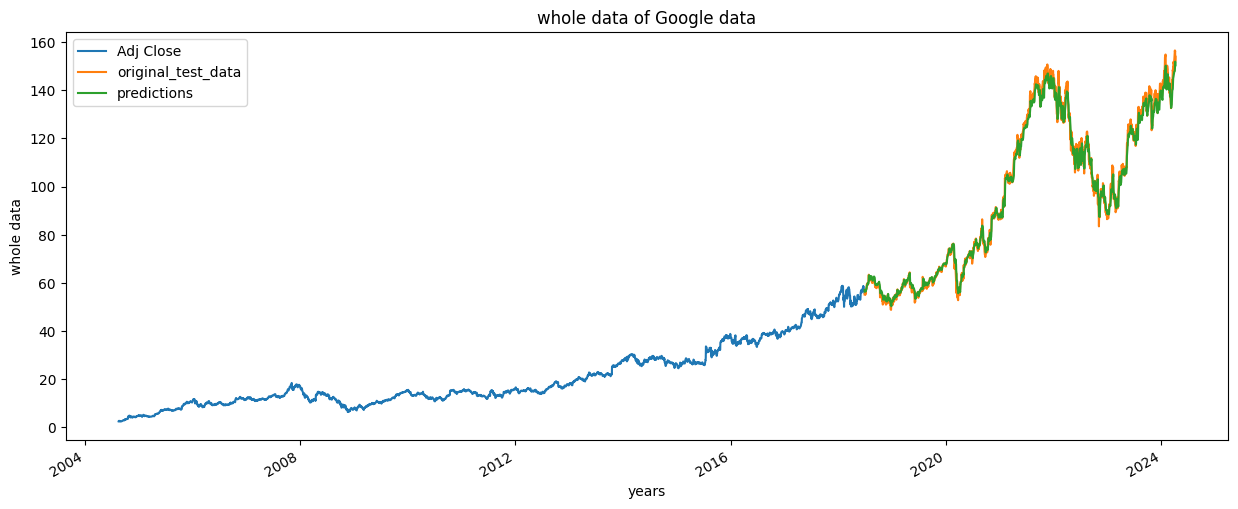

In [88]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0),'whole data')

In [89]:
model.save("Latest_stock_price_model.keras")